In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )

In [3]:
pref["感染者数移動平均7"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).mean()

In [4]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)
pref = pd.merge(pref, pop, on="都道府県名", how="left")
pref.head()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,感染者数移動平均7,人口
0,2020-01-16,1,北海道,0,0,0,0,NaN,5267762
1,2020-01-17,1,北海道,0,0,0,0,NaN,5267762
2,2020-01-18,1,北海道,0,0,0,0,NaN,5267762
3,2020-01-19,1,北海道,0,0,0,0,NaN,5267762
4,2020-01-20,1,北海道,0,0,0,0,NaN,5267762


In [12]:
pref["10万人あたり感染者数"] = pref["各地の感染者数_1日ごとの発表数"]/pref["人口"]/100000
pref["10万人あたり感染者数移動平均7"] = pref["10万人あたり感染者数"].rolling(7).mean()

In [13]:
pref.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22466 entries, 0 to 22465
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   日付                22466 non-null  datetime64[ns]
 1   都道府県コード           22466 non-null  int64         
 2   都道府県名             22466 non-null  object        
 3   各地の感染者数_1日ごとの発表数  22466 non-null  int64         
 4   各地の感染者数_累計        22466 non-null  int64         
 5   各地の死者数_1日ごとの発表数   22466 non-null  int64         
 6   各地の死者数_累計         22466 non-null  int64         
 7   感染者数移動平均7         22460 non-null  float64       
 8   人口                22466 non-null  int64         
 9   10万人あたり感染者数       22466 non-null  float64       
 10  10万人あたり感染者数移動平均7  22460 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 2.1+ MB


In [7]:
prefs = {
    "東京都": ("-",1),
    "大阪府": ("-",1),
    "京都府": ("-",1),
    "兵庫県": ("-",1),
    "愛知県": ("-",1.0),
    "福岡県": ("-",1.0),
    "埼玉県": ("--",1.0),
    "千葉県": ("--",1.0),
    "神奈川県": ("--",1.0),
    "沖縄県": ("--",1.0),
    "北海道": ("--",1.0),
    "岐阜県": ("--",1.0),
    "三重県": ("--",1.0),
    "宮城県": ("--",1.0),
}

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


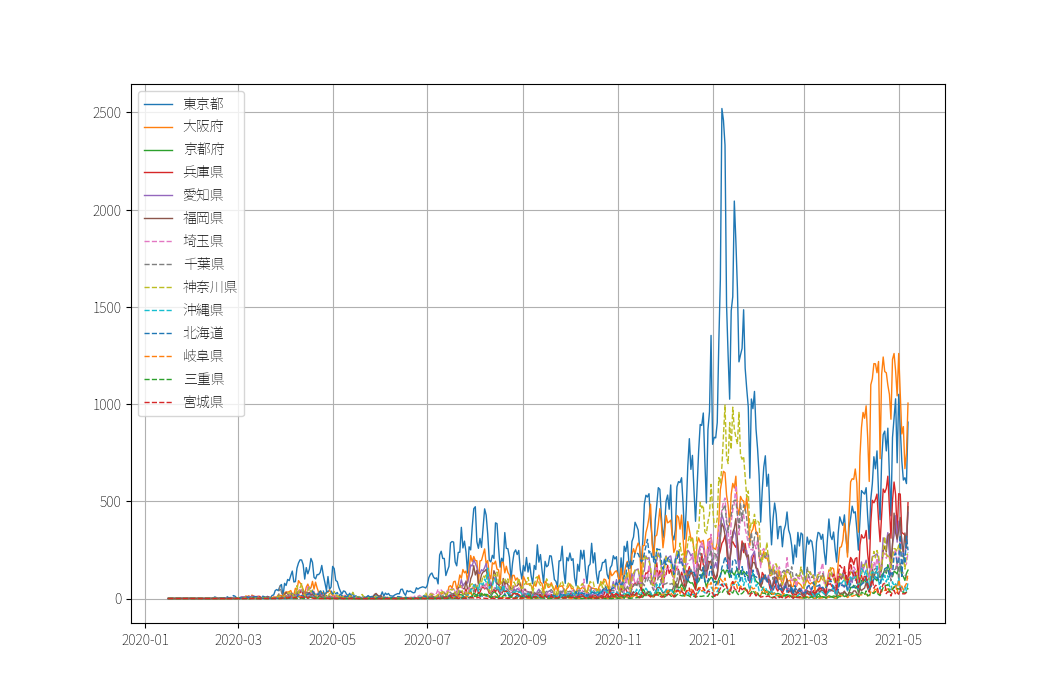

In [9]:
plt.figure(figsize=(10.5,7))
dates = pref["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref.loc[pref["都道府県名"]==p]["各地の感染者数_1日ごとの発表数"],label=p, fmt=prefs[p][0], lw=prefs[p][1])
plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


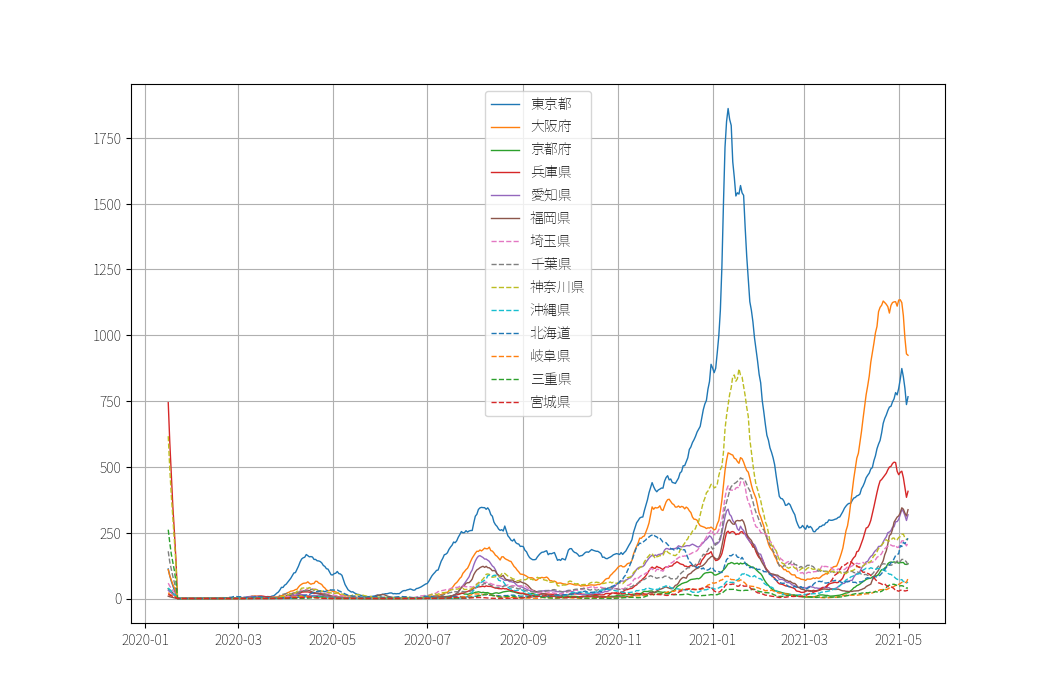

In [10]:
plt.figure(figsize=(10.5,7))
dates = pref["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref.loc[pref["都道府県名"]==p]["感染者数移動平均7"],label=p, fmt=prefs[p][0], lw=prefs[p][1])
plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


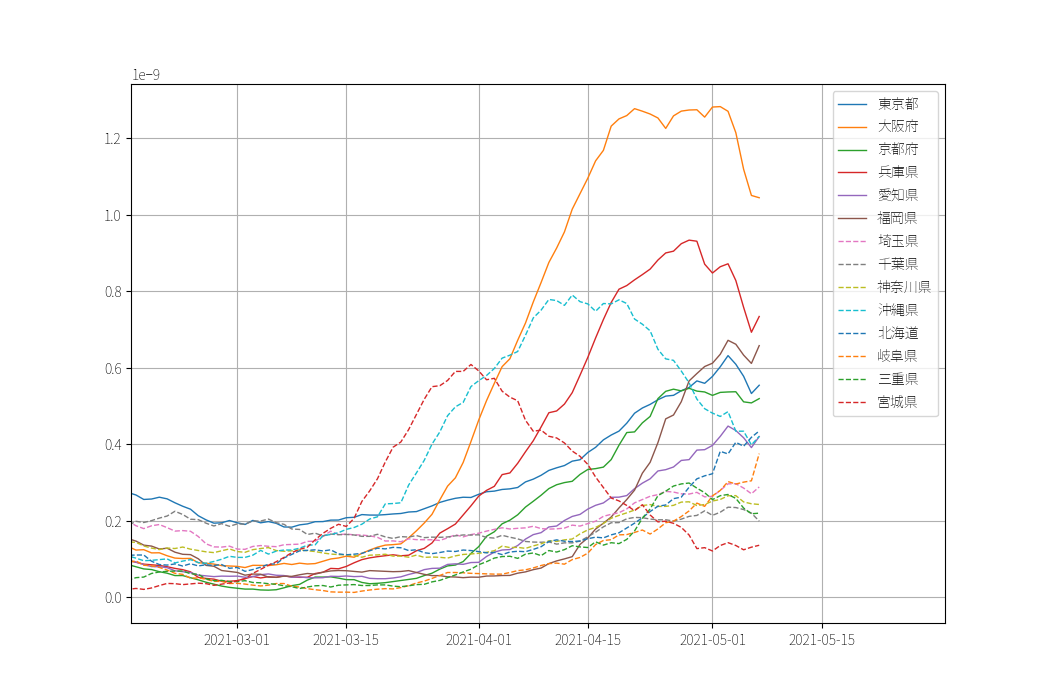

In [14]:
plt.figure(figsize=(10.5,7))
dates = pref["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref.loc[pref["都道府県名"]==p]["10万人あたり感染者数移動平均7"],label=p, fmt=prefs[p][0], lw=prefs[p][1])
plt.grid()
plt.legend()